## 1. Business Understanding
A company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. To evaluate the potential risks associated with purchasing and operating airplanes, the company will consider historical accident trends. Data will be sourced from National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents.

### a. General Objective
To determine which aircraft are the lowest risk for the company to start this new business endeavor.

### b. Research questions
i. Aircraft Make and model: What is the relationship between Accidents and Aircraft Make and model?

ii. Amateur Built: Is there a correlation between accidents trends of amateur built and professional built aircrafts.

iii. Number of Engines: Does number of engines determine safety.

iv. Engine types: Is there a relationship between engine type and number of accidents.

## 2. Data Understanding


In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
# Ignore all the warnings
warnings.filterwarnings('ignore')

### Loading the data

In [ ]:
#loading the data and set encoding because there are Non-ASCII characters
df = pd.read_csv('AviationData.csv', encoding='latin1')
#preview the first five rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [ ]:
df.shape

(88889, 31)

In [ ]:
# See all value occurences across all columns
cols = ['Investigation.Type', 'Location', 'Country', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Registration.Number', 'Make', 'Amateur.Built', 'Publication.Date', 'Weather.Condition', 'Purpose.of.flight']
for col in df[cols].columns:
    print(df[col].value_counts().nlargest(5))
    print('\n---\n')

Investigation.Type
Accident    85015
Incident     3874
Name: count, dtype: int64

---

Location
ANCHORAGE, AK      434
MIAMI, FL          200
ALBUQUERQUE, NM    196
HOUSTON, TX        193
CHICAGO, IL        184
Name: count, dtype: int64

---

Country
United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
Name: count, dtype: int64

---

Airport.Code
NONE    1488
PVT      485
APA      160
ORD      149
MRI      137
Name: count, dtype: int64

---

Airport.Name
Private             240
PRIVATE             224
Private Airstrip    153
NONE                146
PRIVATE STRIP       111
Name: count, dtype: int64

---

Injury.Severity
Non-Fatal    67357
Fatal(1)      6167
Fatal         5262
Fatal(2)      3711
Incident      2219
Name: count, dtype: int64

---

Registration.Number
NONE      344
UNREG     126
UNK        13
USAF        9
N20752      8
Name: count, dtype: int64

---

Make
Cessna    22227
Piper     12029
CESSNA     4922
Beec

## 3. Data Preparation

In [ ]:
# check the no of missing values per column
df.isna().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,52
Country,226
Latitude,54507
Longitude,54516
Airport.Code,38757
Airport.Name,36185


In [ ]:
#percentage of missing values per column
df.isna().mean()*100

,0
Event.Id,0.000000
Investigation.Type,0.000000
Accident.Number,0.000000
Event.Date,0.000000
Location,0.058500
Country,0.254250
Latitude,61.320298
Longitude,61.330423
Airport.Code,43.601570
Airport.Name,40.708074


### a. Dropping columns

In [ ]:
#drop columns with more than 30% missing values
columns_to_drop_missing =['Latitude','Longitude', 'Airport.Code','Airport.Name','Aircraft.Category','FAR.Description', 'Schedule','Air.carrier','Broad.phase.of.flight']
df= df.drop(columns=columns_to_drop_missing)

In [ ]:
# drop columns that are not necessary to the analysis
columns_to_drop_unuseful=['Accident.Number','Registration.Number','Report.Status','Publication.Date']
df = df.drop(columns=columns_to_drop_unuseful)

In [ ]:
df.isna().sum()

,0
Event.Id,0
Investigation.Type,0
Event.Date,0
Location,52
Country,226
Injury.Severity,1000
Aircraft.damage,3194
Make,63
Model,92
Amateur.Built,102


### b. Renaming columns

In [ ]:
# Rename the columns to easier names
new_column_names = {'Event.Id': 'ID', 'Investigation.Type': 'Type', 'Event.Date':'Date', 'Injury.Severity':'Injury_Severity',
                    'Aircraft.damage':'Damage_type','Amateur.Built':'Amateur_Built', 'Number.of.Engines':'Engines', 'Purpose.of.flight':'Flight_Purpose',
                    'Total.Fatal.Injuries':'Fatal_Injuries','Engine.Type':'Engine_Type', 'Total.Serious.Injuries':'Serious_Injuries',
                   'Total.Minor.Injuries':'Minor_Injuries', 'Total.Uninjured':'Uninjured', 'Weather.Condition':'Weather',}
df = df.rename(columns=new_column_names)


In [ ]:
#see the new columns names
df.columns

Index(['ID', 'Type', 'Date', 'Location', 'Country', 'Injury_Severity',
       'Damage_type', 'Make', 'Model', 'Amateur_Built', 'Engines',
       'Engine_Type', 'Flight_Purpose', 'Fatal_Injuries', 'Serious_Injuries',
       'Minor_Injuries', 'Uninjured', 'Weather'],
      dtype='object')

In [ ]:
#Check for unique ID's
df['ID'].value_counts()

,count
ID,
20001212X19172,3
20001214X45071,3
20220730105623,2
20051213X01965,2
20001212X16765,2
...,...
20001211X14216,1
20001211X14239,1
20001211X14207,1


In [ ]:
#no of duplicated rows
df.duplicated().sum()

38

### c. Droping duplicates

In [ ]:
#drop the duplicated rows
df = df.drop_duplicates()

In [ ]:
df.shape

(88851, 18)

In [ ]:
df.isna().sum()

,0
ID,0
Type,0
Date,0
Location,52
Country,226
Injury_Severity,999
Damage_type,3191
Make,63
Model,92
Amateur_Built,102


In [ ]:
df.head()

,ID,Type,Date,Location,Country,Injury_Severity,Damage_type,Make,Model,Amateur_Built,Engines,Engine_Type,Flight_Purpose,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC


### d. Filling missing values per column

In [ ]:
#Country
df['Country'].value_counts()/ len(df)*100

,count
Country,
United States,92.529066
Brazil,0.420929
Canada,0.404047
Mexico,0.402922
United Kingdom,0.387165
...,...
Seychelles,0.001125
Palau,0.001125
Libya,0.001125


In [ ]:
#since Country data is categorical and the mode is at 92.5%, we replace missing values with mode
df['Country'].fillna(df['Country'].mode()[0],inplace=True)

In [ ]:
#To avoid bias, fill these columns with uknown 'UKN'
columns_to_fill_uknown =['Location','Injury_Severity','Damage_type','Make','Model','Amateur_Built','Engine_Type','Flight_Purpose','Weather']
for col in columns_to_fill_uknown:
  df[col].fillna("Unknown",inplace=True)

In [ ]:
df.isna().sum()

,0
ID,0
Type,0
Date,0
Location,0
Country,0
Injury_Severity,0
Damage_type,0
Make,0
Model,0
Amateur_Built,0


In [ ]:
#the columns remaining columns have a numerical value, we have to fill them with either mean, median, mode or drop rows
df.describe()

,Engines,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured
count,82770.000000,77455.000000,76351.000000,76928.000000,82944.000000
mean,1.146478,0.647757,0.279892,0.357061,5.310004
std,0.446379,5.487059,1.544285,2.235891,27.841800
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


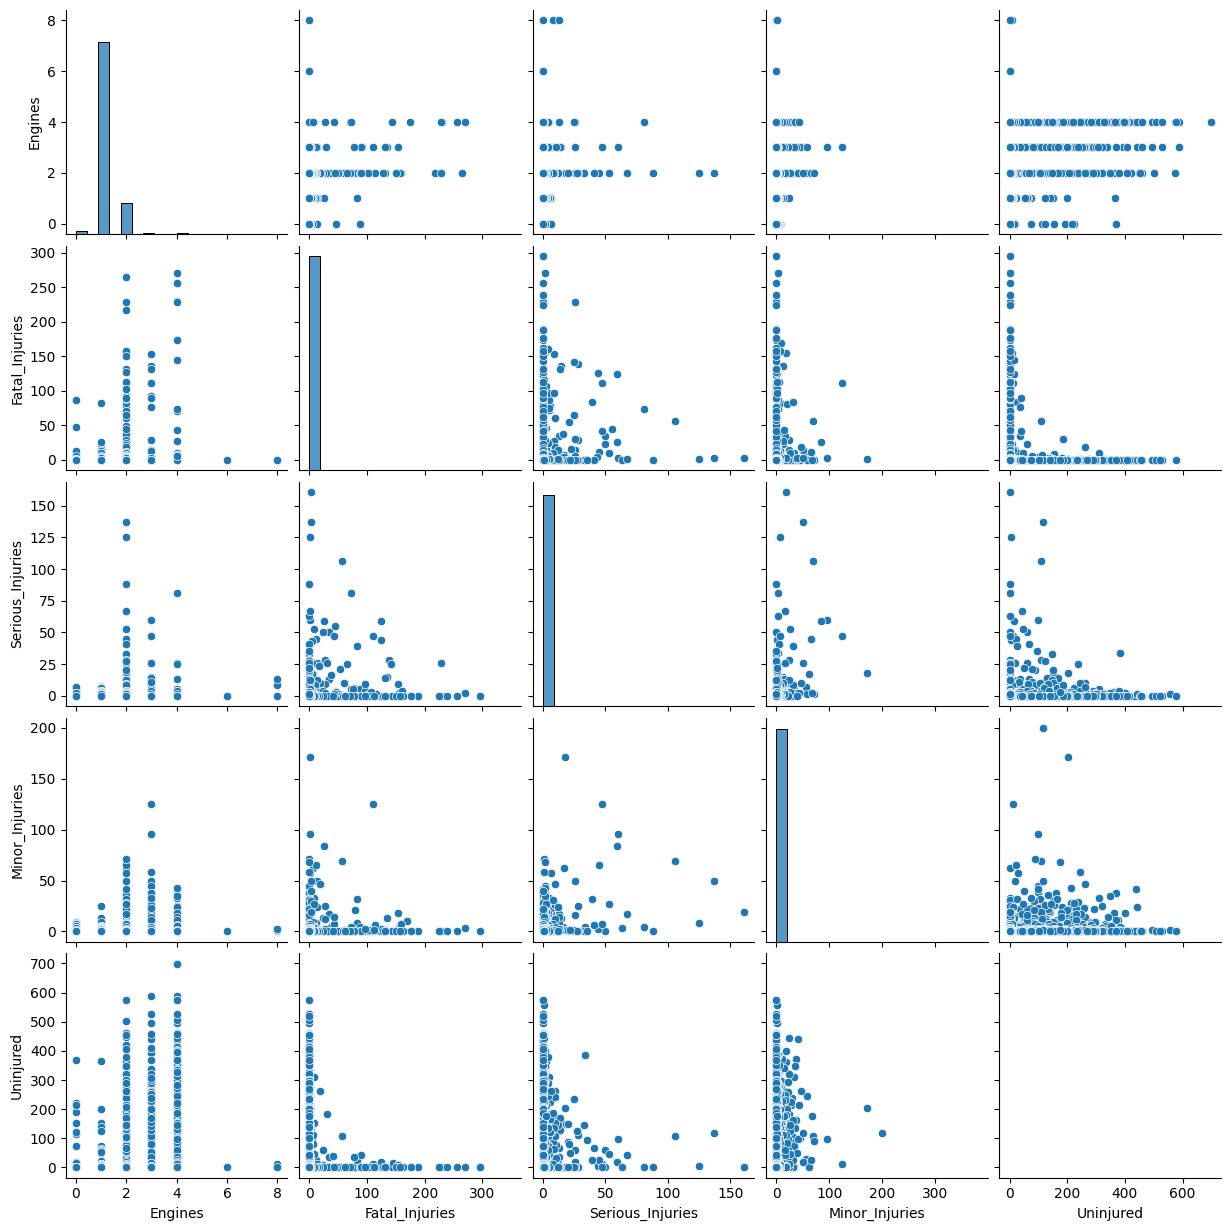

In [ ]:
# pair plots
sns.pairplot(df)

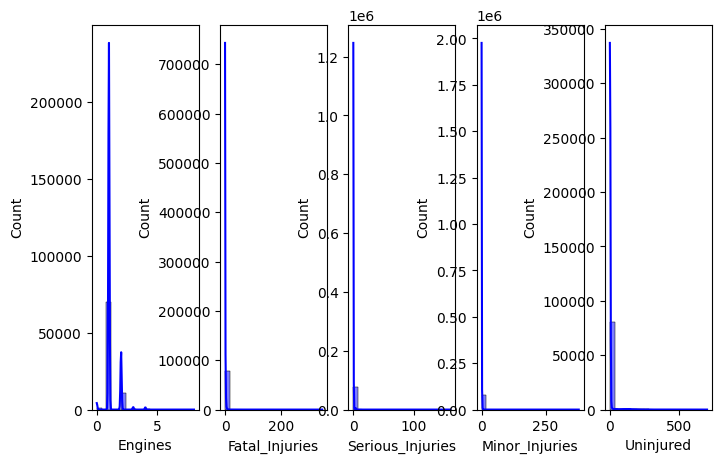

In [ ]:
#subplots
numeric_columns=['Engines','Fatal_Injuries','Serious_Injuries','Minor_Injuries','Uninjured']
# Set up the subplots
fig, axes = plt.subplots(1, len(numeric_columns), figsize=(8, 5))
# Plot histograms for each column
for col, ax in zip(numeric_columns, axes):
    sns.histplot(data=df, x=col, bins=20, color='blue', ax=ax, kde=True)



In [ ]:
#From the subplots, all the columns are skewed and therefore will fill the missing values with median
for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)

In [ ]:
df.isna().sum()

,0
ID,0
Type,0
Date,0
Location,0
Country,0
Injury_Severity,0
Damage_type,0
Make,0
Model,0
Amateur_Built,0


### e. change place holders for some columns

In [ ]:
# Merge different capitalizations of 'Make' together
df['Make'] = df['Make'].str.title()
df['Make'].value_counts().head()

,count
Make,
Cessna,27143
Piper,14869
Beech,5372
Boeing,2738
Bell,2720


In [ ]:
# convert Amateur Built into boolean
df['Amateur_Built'].replace(to_replace = ['Yes', 'Y'], value = True, inplace = True, regex = False)
df['Amateur_Built'].replace(to_replace = ['No', 'N'], value = False, inplace = True, regex = False)
df['Amateur_Built'].value_counts()

,count
Amateur_Built,
False,80277
True,8472
Unknown,102


In [ ]:
# Remove amount of injuries in 'Injury_Severity' as this is aleady in another column
df['Injury_Severity'] = df['Injury_Severity'].str.split('(').str[0]
df['Injury_Severity'].value_counts()

,count
Injury_Severity,
Non-Fatal,67339
Fatal,17814
Incident,2213
Unknown,999
Minor,217
Serious,173
Unavailable,96


In [ ]:
# Merge weather condition unknowns
df['Weather'].replace(to_replace = ['Unk', 'UNK'], value = 'Unknown', inplace = True, regex = False)
df['Weather'].value_counts()

,count
Weather,
VMC,77268
IMC,5975
Unknown,5608


### f. Convert date column to the appropriate format

In [ ]:
# changing date type to the appropriate format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
# create a new column Year
df['Year'] = df['Date'].dt.year
# create a new column Month
df['Month'] = df['Date'].dt.month

### g. Introduce a column for seasons

In [ ]:
#  creating a column for seasons using the US because it has the majority

seasons = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

df['Season'] = df['Month'].map(seasons)

In [ ]:
df.head()

,ID,Type,Date,Location,Country,Injury_Severity,Damage_type,Make,Model,Amateur_Built,...,Engine_Type,Flight_Purpose,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather,Year,Month,Season
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Destroyed,Stinson,108-3,False,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,Unknown,1948,10,Fall
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Destroyed,Piper,PA24-180,False,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,Unknown,1962,7,Summer
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal,Destroyed,Cessna,172M,False,...,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,1974,8,Summer
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal,Destroyed,Rockwell,112,False,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,1977,6,Summer
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal,Destroyed,Cessna,501,False,...,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,1979,8,Summer


## 3. Data Analysis

### a. Frequency of Accidents and Incidents by Make

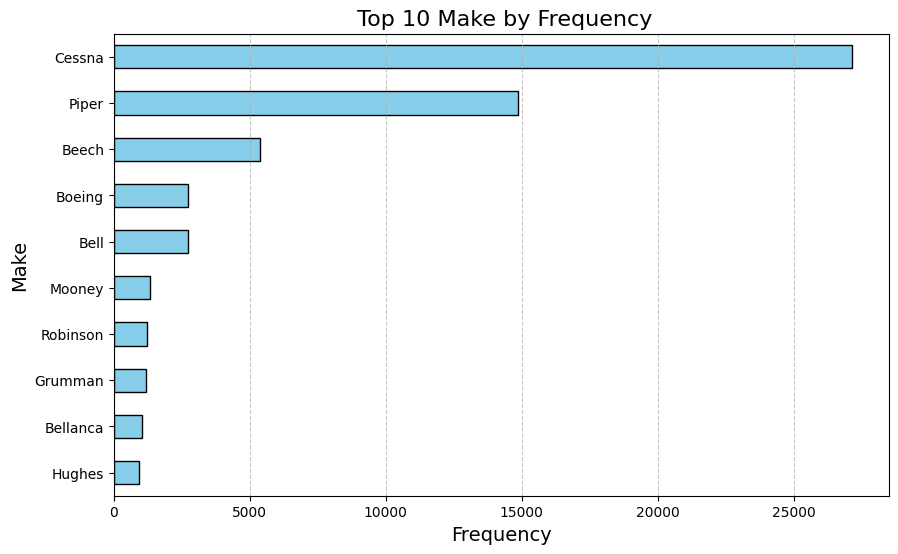

In [ ]:
make_freq=df['Make'].value_counts().head(10)
# create a horizontal bar chart
plt.figure(figsize=(10, 6))
make_freq.plot(kind='barh', color='skyblue', edgecolor='black')

# Customize the plot
plt.title(f" {'Top 10 Make'} by Frequency", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel('Make', fontsize=14)
# Invert the y-axis to show the highest value at the top
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
# Save as PNG
plt.savefig('plot.png', dpi=300)
plt.show()


#### Observation
The Cessna aircraft make tops with the number of accidents.

In [ ]:
# visualize the 10 makes by model with the function below
def visualize_top_10_models_by_make(self):
        top_10_makes = self['Make'].value_counts().head(10).index

        for make in top_10_makes:
            make_data = self[self['Make'] == make]
            top_10_models = make_data['Model'].value_counts().head(10)
            top_10_models.plot(kind='bar', title=f'Top 10 Models for {make} Aircraft in Accidents')
            plt.xlabel('Model')
            plt.ylabel('Number of Accidents')
            plt.show()
        return top_10_makes

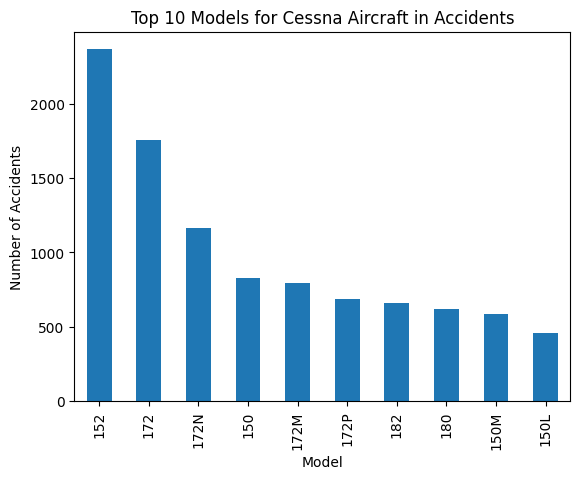

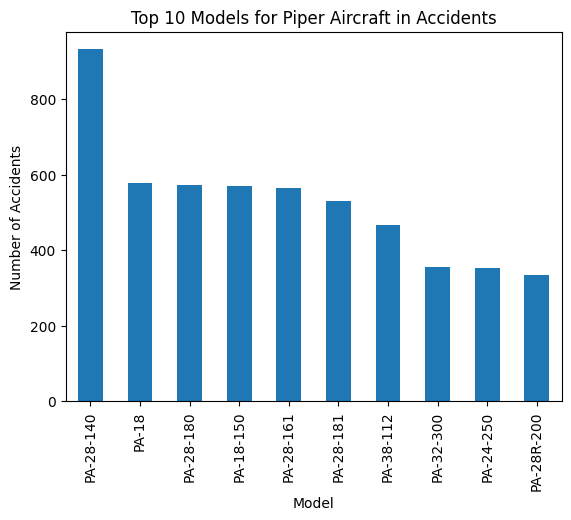

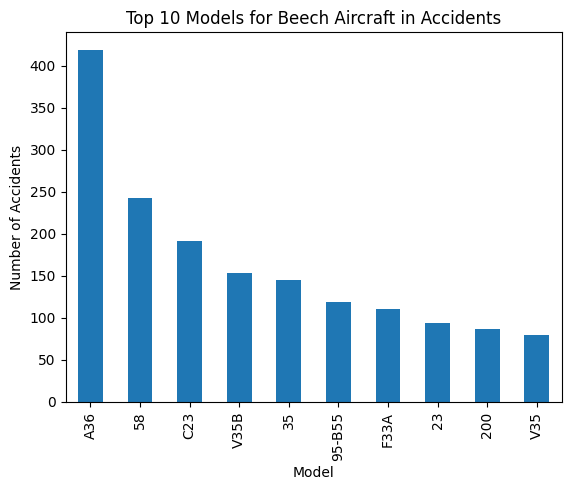

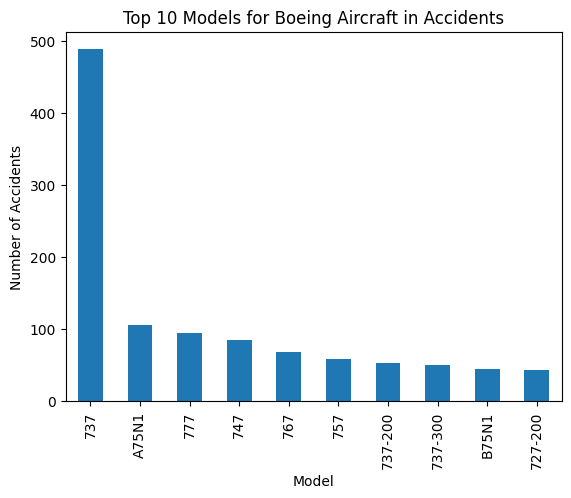

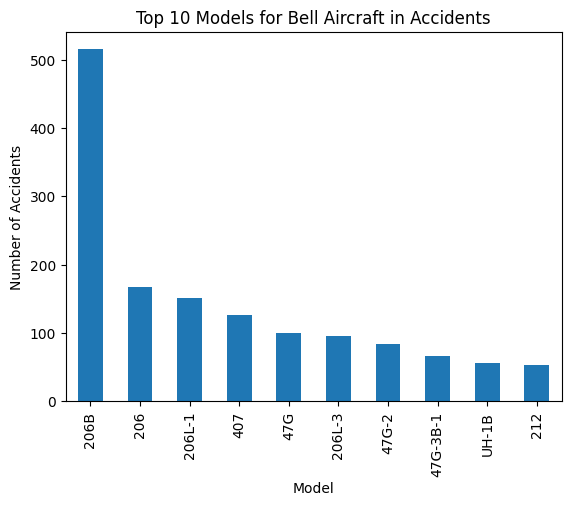

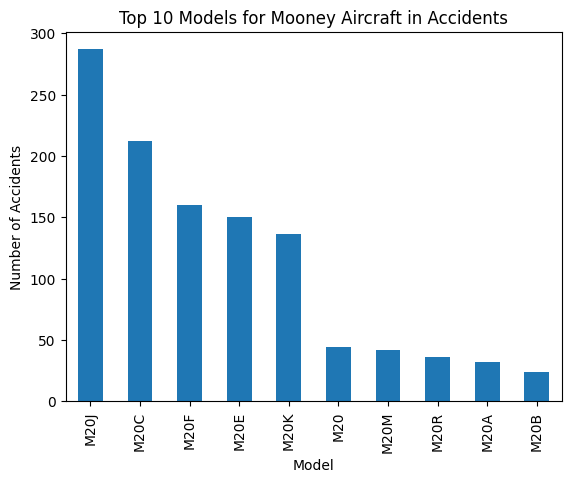

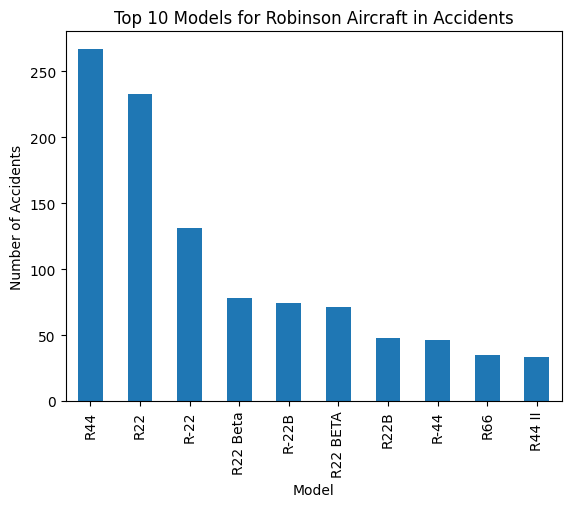

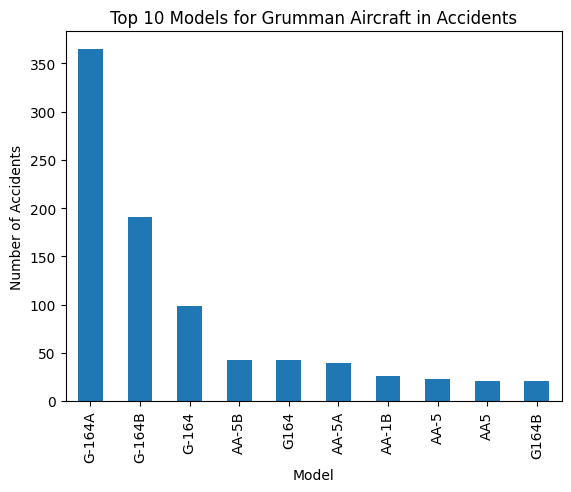

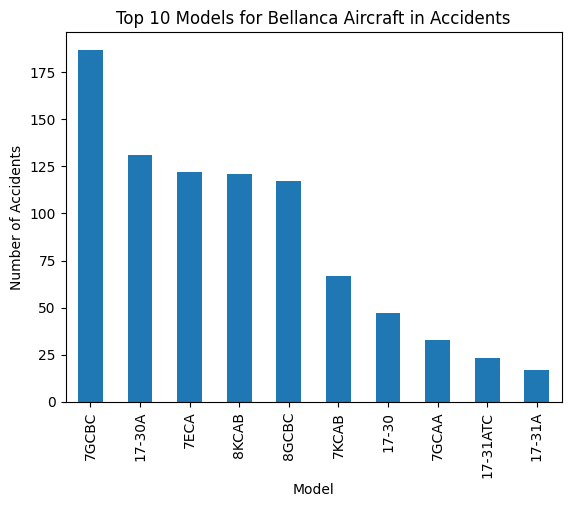

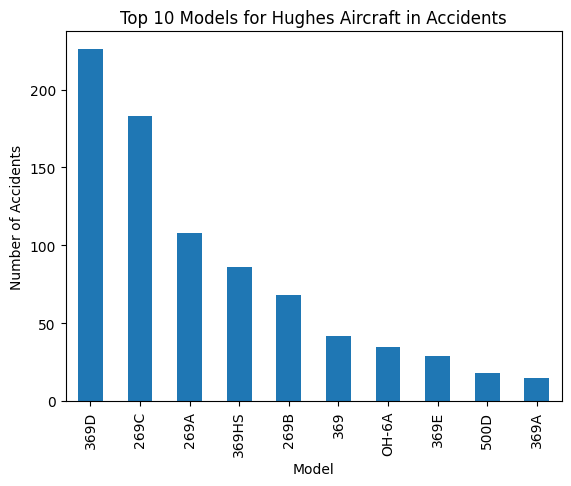

Index(['Cessna', 'Piper', 'Beech', 'Boeing', 'Bell', 'Mooney', 'Robinson',
       'Grumman', 'Bellanca', 'Hughes'],
      dtype='object', name='Make')

In [ ]:
# call the function with the parameter df
visualize_top_10_models_by_make(df)

#### Observations
Breaking down the data, we identify the top Aircraft Makes with high accident involvement.Within these Makes, we then identify the primary models that consistently stand out in terms of accidents.

### b. Built by amateurs

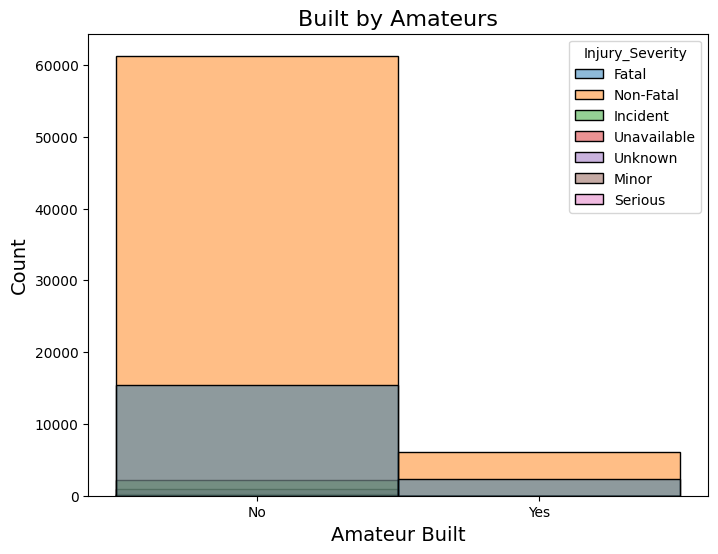

In [ ]:
# Histogram for Amateur_Built column
plt.figure(figsize=(8, 6))
# Remove rows where 'Amateur_Built' is 'Unknown'
df_Amateur = df[df['Amateur_Built'] != 'Unknown']
sns.histplot(data=df_Amateur, x='Amateur_Built', stat='count', bins=2, hue='Injury_Severity', discrete=True)
# Add title and labels
plt.title('Built by Amateurs', fontsize=16)
plt.xlabel('Amateur Built', fontsize=14)
plt.ylabel('Count', fontsize=14)
# Set custom x-axis labels as True/False
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
# Save as PNG
plt.savefig('plot_Amateur_built.png', dpi=300)
# Show the plot
plt.show()

#### Observation
Aircraft that were not Amateur built were involved in more accidents

### c. Number of engines

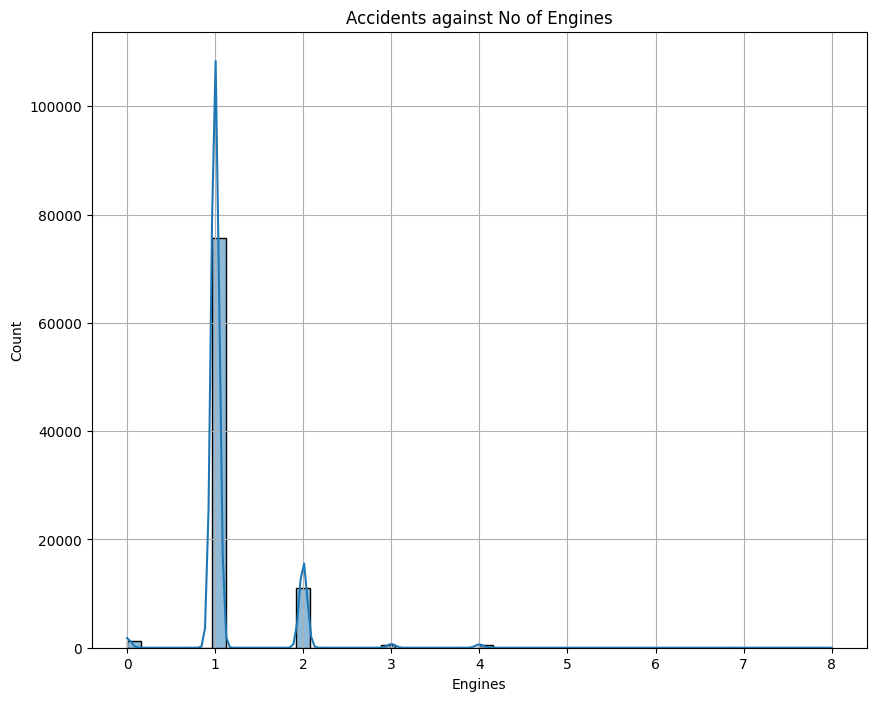

In [ ]:
# histgram
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='Engines', bins=50,  kde=True, palette='bright')
plt.title('Accidents against No of Engines')
plt.grid()
# Save as PNG
plt.savefig('plot_Engine_numbers.png', dpi=300)
plt.show()

The plot shows that aircrafts with one engine were involved in majority of the accidents

### e. Engine type

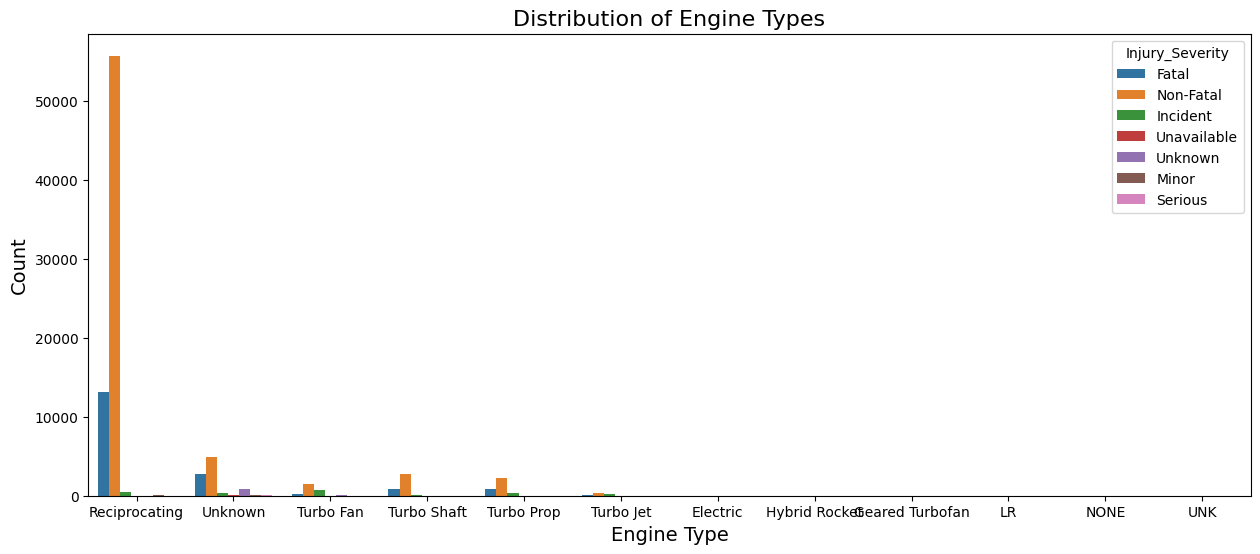

In [ ]:
# Bar plot for engine types
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Engine_Type', hue='Injury_Severity')
# title and labels
plt.title('Distribution of Engine Types', fontsize=16)
plt.xlabel('Engine Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
# Save as PNG
plt.savefig('plot_Engine_type.png', dpi=300)
plt.show()


#### Observation
The data shows that aircrafts with Reciprocating engines were involved in many accidents where the injury severity was mainly non fatal and quite a number being fatal.

### f. Injuries vs Make

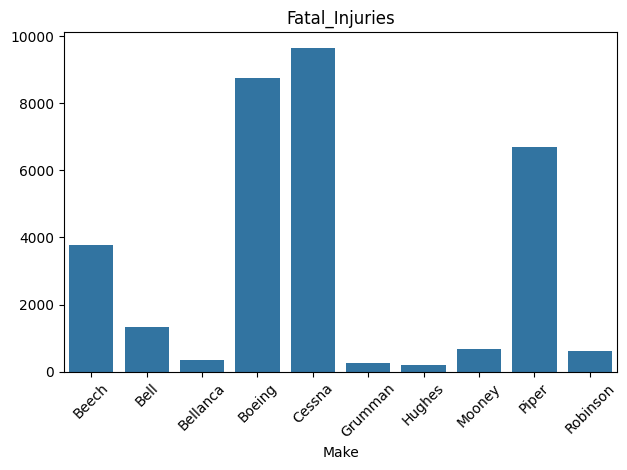

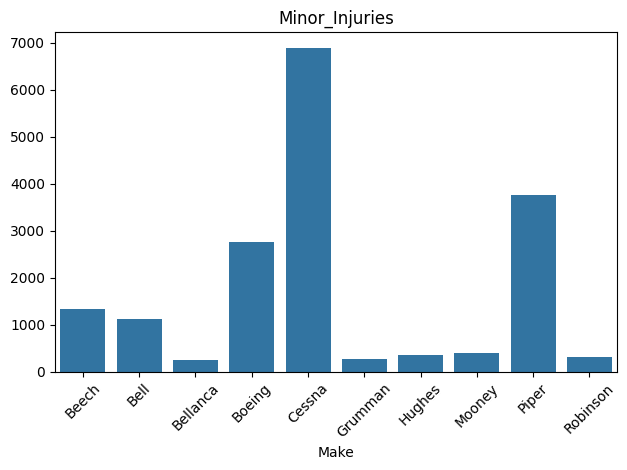

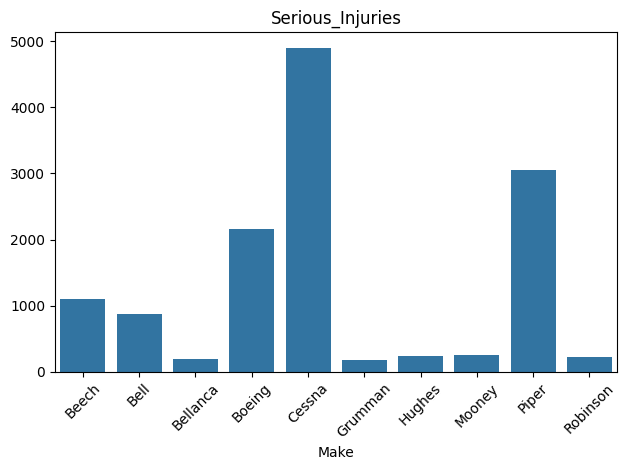

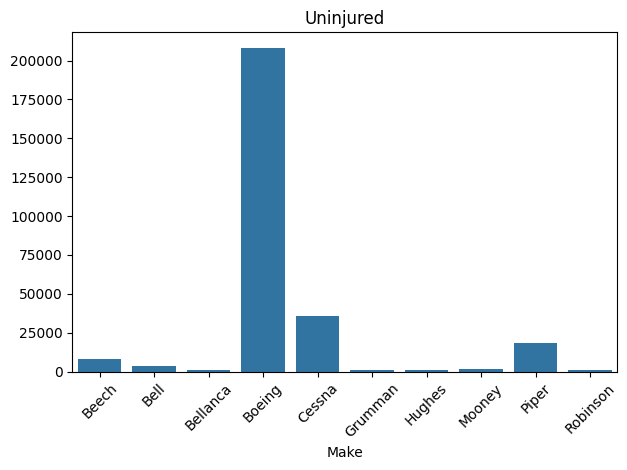

In [ ]:
top10_make=df["Make"].value_counts().head(10)
injuries= ['Fatal_Injuries',	'Serious_Injuries',	'Minor_Injuries',	'Uninjured']
df_injuries = df[['Make'] + ['Fatal_Injuries',	'Serious_Injuries',	'Minor_Injuries',	'Uninjured']]
top_10_make_injuries= df_injuries[df['Make'].isin(top10_make.index)]
inj_pivot= pd.pivot_table(top_10_make_injuries,values=injuries,columns='Make',aggfunc='sum')
for i in range(0,len(inj_pivot)):
    sns.barplot(x=inj_pivot.iloc[i].index,y=inj_pivot.iloc[i].values)
    plt.title(inj_pivot.index[i])
    plt.xticks(rotation=45)
    # avoid layout issues
    plt.tight_layout()
    # Generate a unique filename for each plot
    filename = f"injuries_by_make_{i}.png".replace(" ", "_")
    # Save as Png
    plt.savefig(filename, dpi=300)
    plt.show()


This data suggests that;
1. There are higher incidence of injuries in Cessna aircraft accidents.
2. Passengers aboard Boeing aircraft experienced a significantly higher likelihood of survival from the Uninjured plot.

## 4. Conclusion

From the data analysis, the following observations are made;

1. Cessna aircraft were involved in the highest number of accidents. This could be due to Cessna’s large market share and therefore, warrants a closer inspection of specific models and their safety records.

2. Aircrafts with one engine were disproportionately involved in fatal accidents. it is implied that lack of engine redundancy increases risk during engine failure.

3. Amateur-built aircraft were involved in fewer accidents compared to professionally built ones. While fewer accidents may suggest better outcomes, the data may reflect the lower overall usage or different operational patterns of amateur-built aircraft.

4. Aircraft with reciprocating engines were involved in the most accidents. Reciprocating engines are usually used in general aviation aircraft, which may contribute to higher accident rates due to operational factors like outdated runways.


## 5. Recommendations

1. Conduct a thorough safety audit of Cessna models.Focus on newer models or those with a strong safety track record due to its large market share.

2. Prioritize acquiring aircraft with more than one engine for redundancy and safety in emergencies.

3. Amateur-built aircraft have fewer recorded accidents due to their limited use and operational scope. They should be avoided unless they are professionally inspected and meet rigorous safety standards.

4. Avoid reciprocating engine and shift focus to other engines, which are more reliable.

In general, for the company’s aviation expansion, focus on professionally built, more than one engine and avoid reciprocating engine aircrafts. Conduct detailed assessments of manufacturers like Cessna to identify models with strong safety records. This strategy will minimize risk and align with the company’s goal of safe and sustainable growth in the aviation industry.
